# Logistic Regression


Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Data/hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

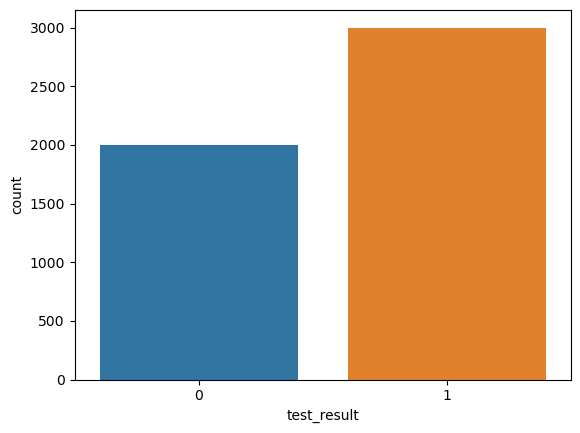

In [8]:
sns.countplot(data=df,x='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

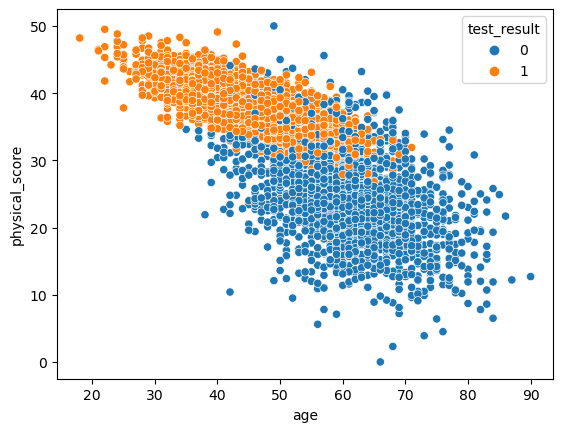

In [9]:
sns.scatterplot(data=df,x='age',y='physical_score',hue='test_result')

<Axes: xlabel='physical_score', ylabel='age'>

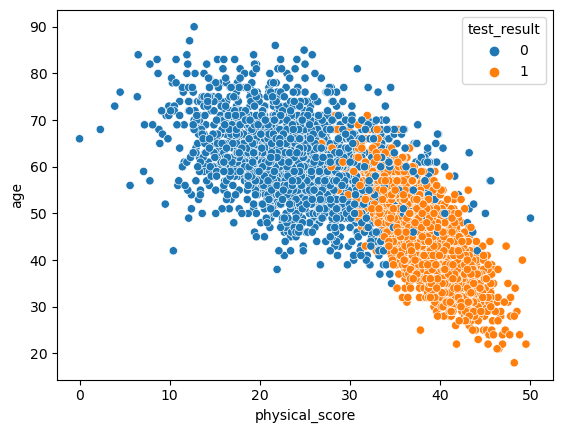

In [10]:
sns.scatterplot(data=df,y='age',x='physical_score',hue='test_result')

<Axes: xlabel='test_result', ylabel='age'>

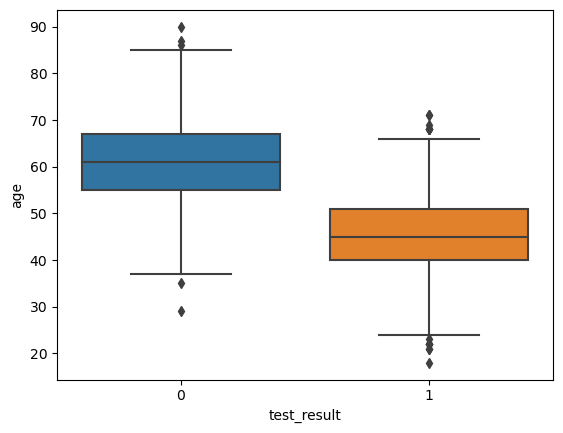

In [11]:
sns.boxplot(data=df,x='test_result',y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

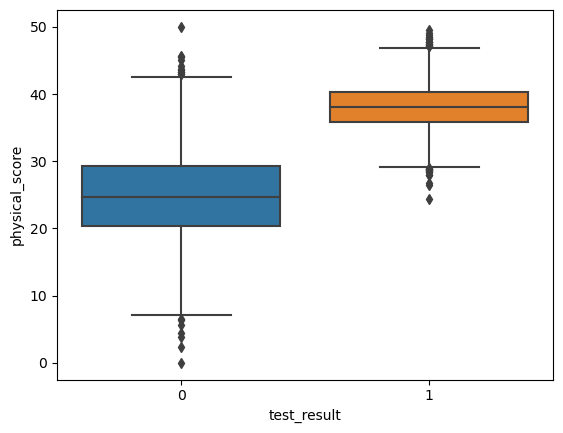

In [12]:
sns.boxplot(data=df,x='test_result',y='physical_score')

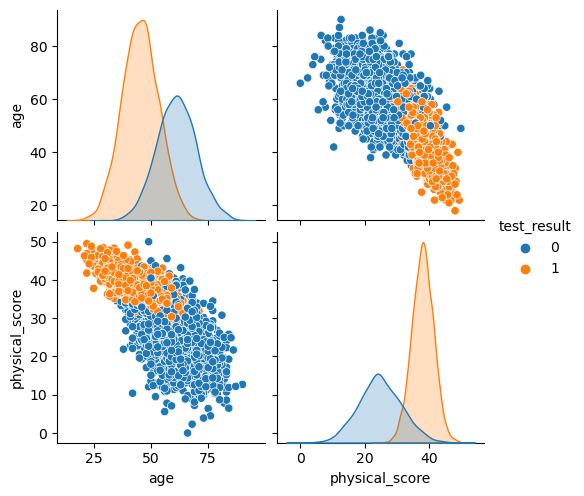

In [13]:
sns.pairplot(data=df,hue='test_result')

<Axes: >

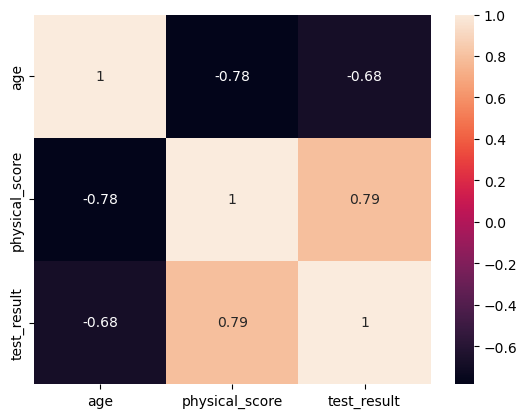

In [14]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='age', ylabel='test_result'>

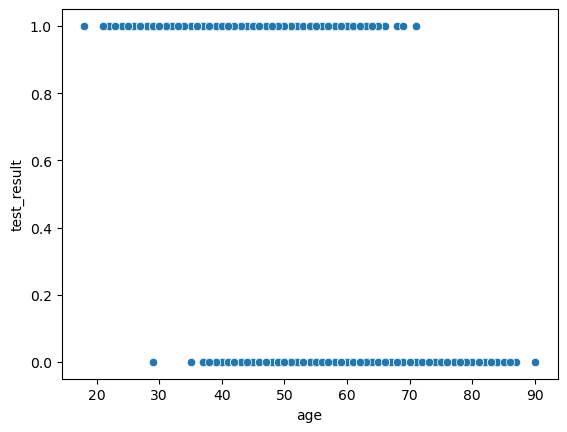

In [15]:
sns.scatterplot(data=df,y='test_result',x='age')

<Axes: xlabel='physical_score', ylabel='test_result'>

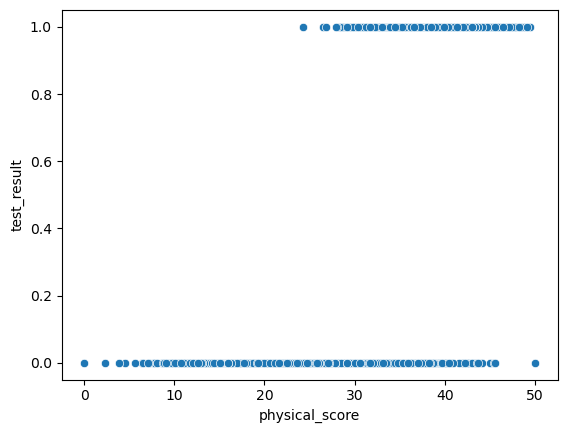

In [16]:
sns.scatterplot(data=df,y='test_result',x='physical_score')

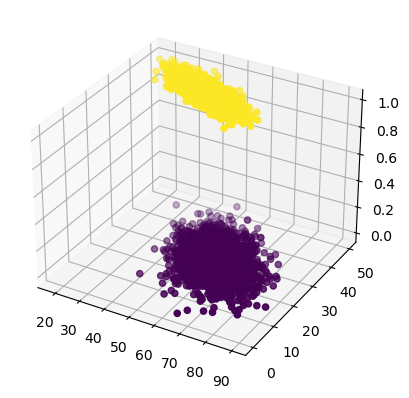

In [17]:
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['physical_score'],df['test_result'], c= df['test_result'])

# Train_Test_Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=df.drop('test_result',axis=1)
y=df['test_result']

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=101)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model=LogisticRegression()

In [25]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [26]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

# Model Performance on Classification Task

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [28]:
y_pred=log_model.predict(X_test)

In [29]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



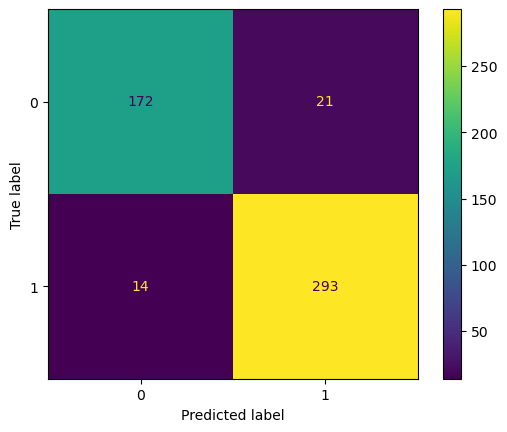

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# Evaluating Curves and AUC

In [32]:
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay

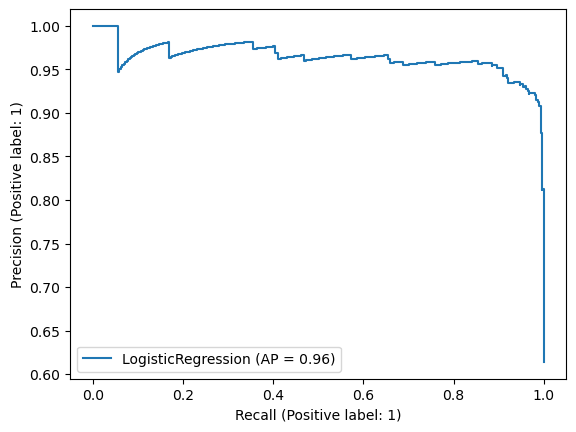

In [33]:
PrecisionRecallDisplay.from_estimator(log_model,X_test,y_test)

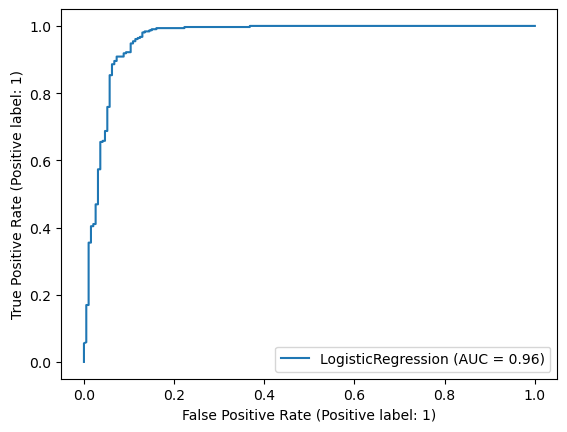

In [34]:
RocCurveDisplay.from_estimator(log_model,X_test,y_test)

# The End